In [63]:
import tweepy
import networkx as nx
import pandas as pd
%matplotlib inline

In [3]:
consumer_key = "rLSO59KOXRjjWisGpsuqqaEdJ"
consumer_secret = "rprRhqIsgxY49qFZlpRZmZs7pMXcFoJrGmryoRUUmXRQm6E9v0"
access_token = "420400261-Qknhgi9XaPv1ZklKdV68Ef4ZzbmjyPTFKynzW2WR"
access_token_secret = "B077y0aYdHAntBR0GKB84xHqkofTW2a99qb42iptprDwE"   

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
res = api.get_user('MakeItAllWork')

In [50]:
with open("followers.txt", "w") as file:
    for user in tweepy.Cursor(api.followers, id=res.id, tweet_mode='extended').items(5):
        file.write(str(user.id) + '\t' + str(res.id) + '\n')

In [36]:
with open("friends.txt", "w") as file:
    for id in tweepy.Cursor(api.friends_ids, id=res.id, tweet_mode='extended').items(5):
        file.write(str(res.id) + '\t' + str(id) + '\n')

In [60]:
def get_network(filename, G2=None):
    G = nx.read_edgelist(filename, create_using=nx.DiGraph())
    if G2 != None:
        G = nx.compose(G, G2)
    return G

In [78]:
G = get_network("friends.txt")
G = get_network("followers.txt", G)
G.add_node('301829187', attr_dict={'gg':12})
G.nodes(data=True)

[('301829187', {}),
 ('743856512', {}),
 ('23994503', {}),
 ('69', {'gg': 12}),
 ('2887131725', {}),
 ('59412175', {}),
 ('813143705909690368', {}),
 ('3100117052', {}),
 ('61675887', {}),
 ('1531585555', {}),
 ('39099783', {}),
 ('957137135785607168', {})]

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


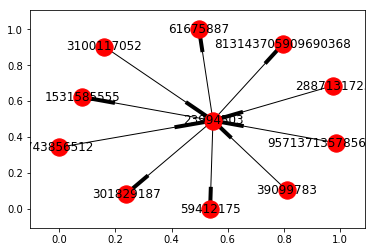

In [64]:
nx.draw_networkx(G)